# __Classification of Music Lyrics for Artists and Songs (I've) played since 2016__

## __Introduction__

Music streaming has uppended the music industry in irreversable ways. Gone are the days of cd distribution and mp3 players with capacity constraints. Today, consumers can access nearly any song ever create - from top artists to recently-minted SoundCloud singer.

Instant access to music with significantly less financial barriers supports the experimentation and exploration of various music forms that conusmers would have passed on in previous phases. Given this, it is helpful to understand how listeners consume music: which genres, artists, and - because there is less emphasis on records - which songs and content. On content, the messages that are or aren't conveyed in music can speak to an artists strategic and creative approach. The following will explore the content in today's music through a process of Natural Language Processing analysis.

### Project Outline

1. Obtain my music listening history data from Apple Music through a database request. More seamless process than using the API. 
2. Obtain music lyrics for each song and artist pair in my listening history data set by using the Genius API.
3. Tokenize and vectorize my text data for initial insights on most frequesnt bigram and trigram phrases. Additionally, I'd like to analyze changes over time and by genre.
4. Build and train a recurrent, bidirectional neural network to classify .....
5. Compare...


### Load and Process Data

First, begin by loading the various libraries and packages needed for initial exploratory data analysis.

In [4]:
#Basic libraries
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

Also import the _path_ package to assist with loading music listening history data as a csv file.

In [5]:
import os.path

In [6]:
path = '/Users/paulraymond/Documents/Datasets/Apple_Music_Play_Activity.csv'

with open(path, 'r') as f:
    data = pd.read_csv(path)
    #what is the best way to do this?

df = pd.DataFrame(data)
df = df.dropna(subset=['Artist Name','Content Name'])
print(len(df))

29420


### Exploratory Data Analysis

Inspect the first rows of the created dataframe.

In [7]:
df.head()

,Apple Id Number,Event End Timestamp,Event Received Timestamp,Device Identifier,Build Version,Milliseconds Since Play,Source Type,Metrics Bucket Id,Event Start Timestamp,Feature Name,...,Offline,UTC Offset In Seconds,Apple Music Subscription,Client IP Address,Content Provider,Content Name,Genre,Artist Name,Content Specific Type,Original Title
0,969907681,2016-08-24T07:51:04.991Z,2016-08-24T08:03:22.759Z,ACBC328A3C5D,NaN,737768,NaN,3909.0,2016-08-24T07:48:26.538Z,my-music,...,False,-14400,True,45.17.61.43,"Blonded, LP",Pretty Sweet,Pop,Frank Ocean,Song,NaN
1,969907681,2018-02-17T16:55:51.529Z,2018-02-17T16:55:51.573Z,edc17c6cf12c25851dd3fa260267b63fda85109d,"Music/3.1 iOS/10.3.3 model/iPhone9,3 hwp/t8010...",44,ORIGINATING_DEVICE,7282.0,2018-02-17T16:55:46.497Z,search / artist_detail / artist_see_all,...,False,-18000,True,107.77.216.171,The Universal Music Group,This Could Be Us,Hip Hop/Rap,Rae Sremmurd,Song,NaN
2,969907681,2018-01-27T22:37:04.233Z,2018-01-27T22:37:04.281Z,edc17c6cf12c25851dd3fa260267b63fda85109d,"Music/3.1 iOS/10.3.3 model/iPhone9,3 hwp/t8010...",48,ORIGINATING_DEVICE,7282.0,2018-01-27T22:37:04.233Z,search,...,False,-18000,True,107.77.216.191,The Universal Music Group,White Iverson,Hip Hop/Rap,Post Malone,Song,NaN
3,969907681,2018-03-20T23:13:04.468Z,2018-03-20T23:13:04.502Z,edc17c6cf12c25851dd3fa260267b63fda85109d,"Music/3.1 iOS/10.3.3 model/iPhone9,3 hwp/t8010...",34,ORIGINATING_DEVICE,7282.0,2018-03-20T23:08:54.111Z,browse / browse / grouping / playlist_detail,...,False,-14400,True,107.77.225.186,The Warner Music Group,Ima Boss (feat. Rick Ross),Hip Hop/Rap,Meek Mill,Song,NaN
4,969907681,2018-06-30T16:11:01.223Z,2018-06-30T16:11:01.331Z,edc17c6cf12c25851dd3fa260267b63fda85109d,"Music/3.1 iOS/11.3 model/iPhone9,3 hwp/t8010 b...",108,ORIGINATING_DEVICE,8100.0,2018-06-30T16:10:43.059Z,search,...,False,-14400,True,170.250.166.6,Sony Music,I Wanna Luv U,R&B/Soul,Donell Jones,Song,NaN


Also review the various columns in this data set.

In [8]:
# df.info()

In [9]:
#make dictionary of artists and songs
artist_v2 = []
song_v2 = []
# while counter < 500:# delete
for track in range(650):
    try:
        artist_v2.append(df['Artist Name'][track])
        song_v2.append(df['Content Name'][track])
    except:
        None

artists_songs_list = list(zip(artist_v2, song_v2))
# artists_song_v2 = dict(zip(artist_v2, song_v2)) #dictionary cannot have duplicate keys so I will have to keep lists seperate
len(artists_songs_list)

650

Plot the artists and songs with highest frequency.

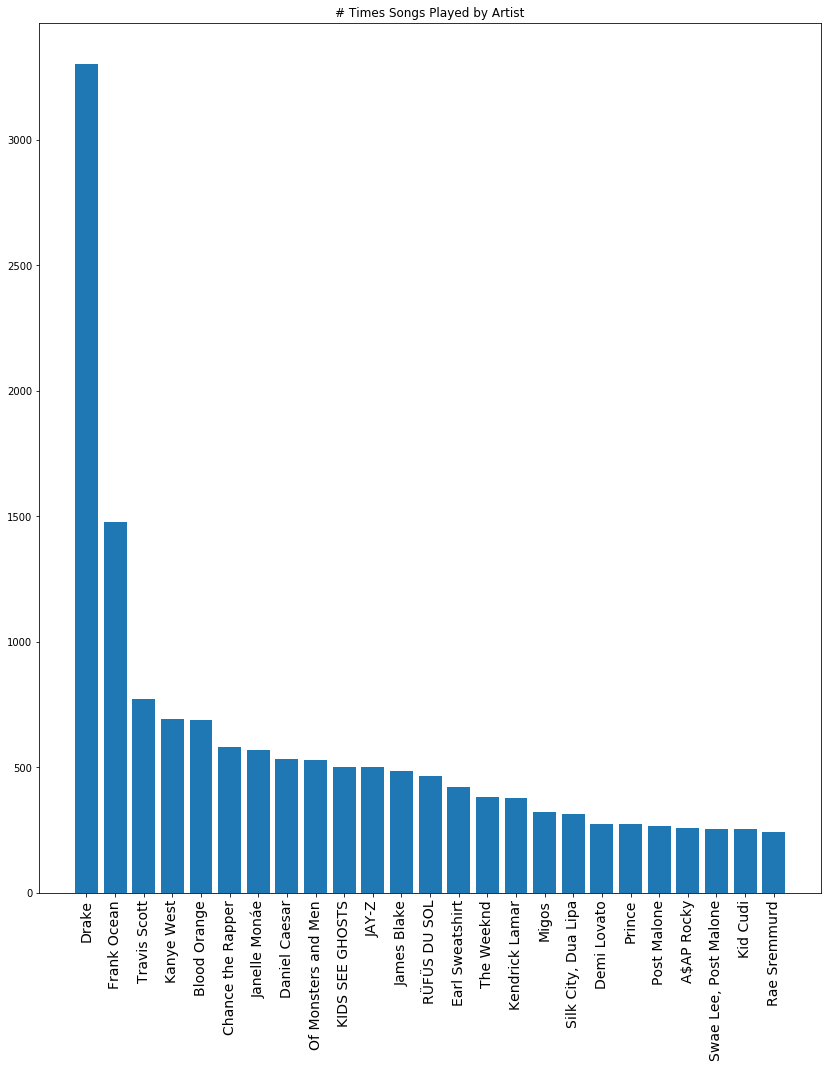

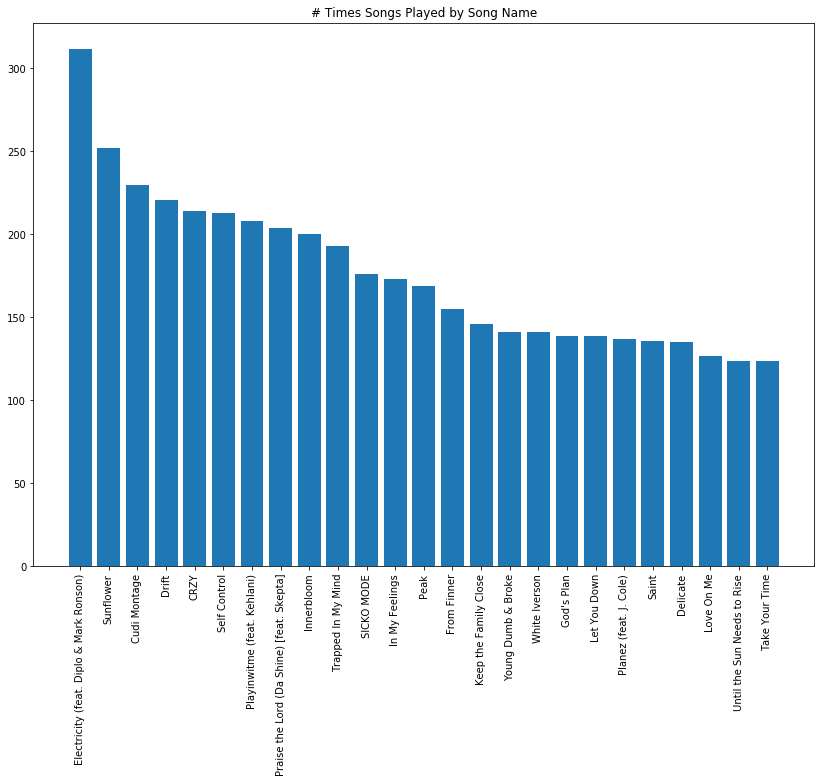

In [10]:
#create frequency distribution for songs and artists
#use groupby on df
artist_freq = df[['Content Name']].groupby(df['Artist Name']).count().reset_index()
artist_freq = pd.DataFrame(artist_freq).sort_values(by=['Content Name'], ascending=False )
artist_freq.head() # doesn't include unique # of tracks; rather number of times played

song_freq = df[['Apple Id Number']].groupby(df['Content Name']).count().reset_index() #using Apple Id Number
song_freq = pd.DataFrame(song_freq).sort_values(by=['Apple Id Number'], ascending=False)


plt.figure(figsize=(14,16))
plt.bar(artist_freq['Artist Name'][:25], artist_freq['Content Name'][:25])
plt.xticks(rotation=90)
plt.style.use('fast')
plt.title('# Times Songs Played by Artist')

# plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)    
plt.xticks(fontsize=14)    
#update the bar color
plt.show()

plt.figure(figsize=(14, 10))
plt.bar(song_freq['Content Name'][:25], song_freq['Apple Id Number'][:25])
plt.xticks(rotation=90)
plt.title('# Times Songs Played by Song Name')
# plt.style.use('bmh')
plt.show()

In [11]:
# artist_freq

In [12]:
# song_freq

It would be interesting to view these results by period - either yearly or quarterly. Will consider this during future refinements.

In [13]:
#add time-series for songs played

In [14]:
#add time-series for top 5 artists played

In [15]:
#add time-series for top songs played

As mentioned earlier, the focus will be on the extent of association of a song's lyrics with it's listed genre. Since the Genre column will there target variable, begin with examination of distribution of the various classes.

Display the list of Genres and the frequency distribution.

In [16]:
df['Genre'].unique()

array(['Pop', 'Hip Hop/Rap', 'R&B/Soul', 'Electronic', 'Alternative',
       'Modern Dancehall', 'Dance', 'Rock', 'Indie Rock', 'Jazz',
       'Hip-Hop', 'Rap', 'Vocal', 'Soundtrack', 'Salsa y Tropical',
       'Country', 'Bollywood', 'World', 'Reggae', 'Soul', 'Electronica',
       'House', 'Pop in Spanish', nan, 'Dirty South', 'Latin Urban',
       'Blues', 'Latin', 'New Age', 'Singer/Songwriter', 'Folk',
       'Hard Rock', 'Indie Pop', 'Hardcore Rap', 'IDM/Experimental',
       'Gospel', 'Caribbean', 'Christian & Gospel', 'East Coast Rap',
       'Rock & Roll', 'Glam Rock', 'Holiday', 'Classical',
       'Alternative Rap', 'Fitness & Workout', 'Adult Contemporary',
       'Downtempo', 'Praise & Worship', 'Pop/Rock', 'West Coast Rap',
       'Classic Blues'], dtype=object)

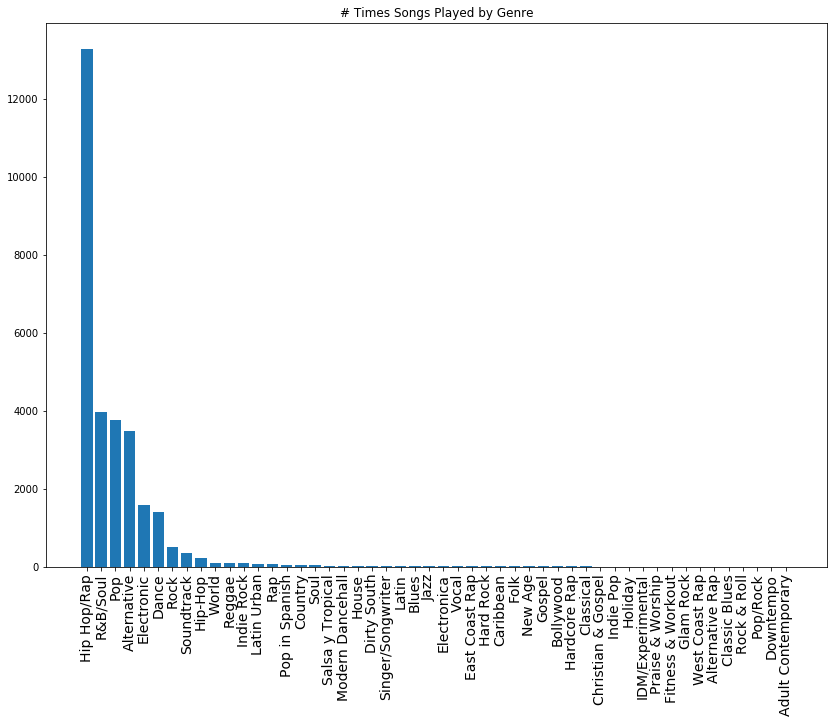

In [70]:
#create frequency distribution for songs and artists
#use groupby on df
genre_freq = df[['Content Name']].groupby(df['Genre']).count().reset_index()
genre_freq = pd.DataFrame(genre_freq).sort_values(by=['Content Name'], ascending=False )
genre_freq.head() # doesn't include unique # of tracks; rather number of times played


plt.figure(figsize=(14,10))
plt.bar(genre_freq['Genre'], genre_freq['Content Name'])
plt.xticks(rotation=90)
plt.xticks(fontsize=14)   
plt.style.use('fast')
plt.title('# Times Songs Played by Genre')
#update the bar color
plt.show()

By far, Hip Hop / Rap songs were played the most, followed by R&B / Soul as a distant second most.

There is a class imbalance that will likely require processing before performing final model.

The list of songs for analysis is available. Next, will look into gathering lyrics for each song by web scraping the Genius.com platform. BeauifulSoup should be effective with these tasks.

The process for compilling lyrics for all of the songs is as follows:
1. Creating API key
2. Create function to determine respective path for each song
3. Create function to request and extract lyrics text
4. Create function to take lyrics, artist, and song name and append to appropriate lists

## API connections and webscrapping

In [18]:
#perform webscraping to pull song lyrics

In [19]:
#import libraries and packages
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [20]:
#create the script for the API call below to get the url links

In [21]:
#import the Requests library
import requests 

In [22]:
#create header to store and pass API key
api_key = 'E8ftkE_LrWhcKrmozlcDuqRWj4EeXSUtD1tFyTAI-SbZ7fnncIuY_0Mr58HHBvst'
headers = {
    'Authorization': 'Bearer {}'.format(api_key),
}

I want the following flow for my lyrics function:
    
    The lyrics function should take in a dictionary with a list of artists and songs as well as an api key, and then return a dictionary with raw text of song lyrics for every song and artist.
    Within the lyrics function, there should be a function that uses a api search to return the song url path.
    Within the generate_song_path function, there should be a function that uses the inputs to return url parameters.
    The response function should take in the inputs and return url parameter.

A function is needed to output the correct url params to be used as a query, when provided the artist and song.

In [23]:
#create function to get json response
api_key = 'E8ftkE_LrWhcKrmozlcDuqRWj4EeXSUtD1tFyTAI-SbZ7fnncIuY_0Mr58HHBvst'
def genius_response(song, artist, api_key):
    song_name = song #update
    artist_name = artist #update
    url_params = song_name.replace(" ", "%20") + "%20" + artist_name.replace(" ", "%20")
    return url_params

In [24]:
#test out the response function
genius_response("again", "janet jackson", api_key)

'again%20janet%20jackson'

In [25]:
#tests a get request and explore the output
api_key = 'E8ftkE_LrWhcKrmozlcDuqRWj4EeXSUtD1tFyTAI-SbZ7fnncIuY_0Mr58HHBvst'
testss = requests.get('https://api.genius.com/search?q=drake', headers=headers)
testss.json()['response']['hits'][0]['result']

{'annotation_count': 20,
 'api_path': '/songs/3315890',
 'full_title': "God's Plan by\xa0Drake",
 'header_image_thumbnail_url': 'https://images.genius.com/921b81a80b404f357609b3884052312e.300x169x1.jpg',
 'header_image_url': 'https://images.genius.com/921b81a80b404f357609b3884052312e.1000x563x1.jpg',
 'id': 3315890,
 'lyrics_owner_id': 1507505,
 'lyrics_state': 'complete',
 'path': '/Drake-gods-plan-lyrics',
 'pyongs_count': 826,
 'song_art_image_thumbnail_url': 'https://images.genius.com/91dfa9a875349f2c1a4c8c6420642c04.300x300x1.jpg',
 'song_art_image_url': 'https://images.genius.com/91dfa9a875349f2c1a4c8c6420642c04.600x600x1.jpg',
 'stats': {'unreviewed_annotations': 0,
  'concurrents': 8,
  'hot': False,
  'pageviews': 7984800},
 'title': 'God’s Plan',
 'title_with_featured': "God's Plan",
 'url': 'https://genius.com/Drake-gods-plan-lyrics',
 'primary_artist': {'api_path': '/artists/130',
  'header_image_url': 'https://images.genius.com/cbb7ed09071d202a9701717494c04bf8.1000x563x1.j

In [26]:
#add time if I decide to add a lag between requests
import time

A function is needed to execute the get request for the respective html file of a song on the Genius platform, and then return a specific path url for the appropriate song. This is done throught the search endpoint of the Genius API. Given that a search can provide multiple results, a condition is included in the function to ensure that the correct file for a given artist and song is selected.

In [27]:
#create function to find song id
def genius_song_path(song_, artist_, api_key):
    song_path = song_
    artist_path = artist_
    url = 'https://api.genius.com/search?q='
    genius_url_params = genius_response(song_path, artist_path, api_key)
    headers = {'Authorization': 'Bearer {}'.format(api_key),}
    try:
        r = requests.get(url + str(genius_url_params), headers=headers)
    #     time.sleep(1)  #toggled off
        included = []
        for row in r.json()['response']['hits']:
            artist_r = row['result']['primary_artist']['name'] 
            if str(artist_r).lower() == str(artist_path).lower():
                included.append(row)
        if len(included) != 0:
            path = included[0]['result']['path'] #assuming that genius returns most relevent result first and then added to 'included' first
            #need to add condition if there isnt a match which means included list is empty and not callable
            return path #make sure this is path (temp change to row)
    except:
        None

In [28]:
#test song_path function
genius_song_path("same drugs", "chance the rapper", api_key)

'/Chance-the-rapper-same-drugs-lyrics'

Finally, a function is needed to provide the lyrics for a song after scrapping the Genius platform with BeautifulSoup. The previous functions created above will be nested within this final function to streamline the process. The output will be four lists: artist_list, song_list, song_lyrics, and failed entries.

In [29]:
#create function to get song lyrics
def genius_lyrics(list_of_songs, api_key): # change so that parameter is dictionary
#     lyrics_dict = {} #updated dictionary
    artist_list = []
    song_list = []
    song_lyrics = []
    failed_entries = {}
    # create loop for every dictionary entry
    for track in list_of_songs:
        g_path = genius_song_path(track[1], track[0], api_key)
        headers = {'Authorization': 'Bearer {}'.format(api_key),}
        try:
            get_request = requests.get('https://www.genius.com'+str(g_path)) #genius
            soup = BeautifulSoup(get_request.content, 'html.parser')
            soup.prettify()
            raw_lyrics = soup.p.get_text()
            song_g = track[1]
            artist_g = track[0]
            song_list.append(song_g)
            artist_list.append(artist_g)
            song_lyrics.append(raw_lyrics)
        except:
            failed_entries[artist_g] = [song_g]
#     lyrics_dict = dict(zip(artist_list, song_lyrics.items())) #delete
    return artist_list, song_list, song_lyrics, failed_entries 

The lyrics function is essembled correctly. Next, the list of songs and artists will be passed into the function, and returning seperate lists for use in the NLP analysis.`

In [75]:
len(artists_songs_list)

650

In [31]:
# lyrics_dict, failed_entries = genius_lyrics(artists_songs_list, api_key)

Next, pass the dictionary of artists and songs into the genius_lyrics function.

In [32]:
artist_list, song_list, song_lyrics, failed_entries = genius_lyrics(artists_songs_list, api_key)

From cffi callback <function _verify_callback at 0x1a1ce74ae8>:
Traceback (most recent call last):
  File "/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/OpenSSL/SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


In [76]:
len(artist_list)

565

### Additional processing

In [33]:
#check to make sure that results are in correct order across each list
print(artist_list[:5])
print(song_list[:5])
print(song_lyrics[:5])

['Frank Ocean', 'Rae Sremmurd', 'Post Malone', 'Meek Mill', 'Donell Jones']
['Pretty Sweet', 'This Could Be Us', 'White Iverson', 'Ima Boss (feat. Rick Ross)', 'I Wanna Luv U']
["[Intro]\nNow, to the edge I'll race\nTo the end I'll make it\nAll the risk, I'll take it\nHead bang with my faux friends\nWe pour a taste out for the dead\nThis is the blood, the body, the life right now\nThe height right now\nMight be what I need\nMight be what I need\nSaid you wanna hurt me now\nYou can't hurt me now\nThat might be what you need\n\n[Verse]\nWhat it means to be alive on this side\n(Said you wanna kill me now)\nOn this side\n(Don't let me down)\nOn this side\n(Down, down)\nFuck the other side\nI'm on this side, I'm on this side, I'm on this side\nHow it feels to have arrived\nI'm inside, I'm inside\nThose are my niggas for life\nMothers of us be kind\nTo the fathers on whom we rely\nFathers of us be kind\nTo the mothers on whom we rely\nAh-hah, ah-hah, ah-hah, ah-hah\nAh-hah, ah-hah, ah-hah, a

In [34]:
#create a dictionary with artist and lyrics
#create unique names for keys
artist_song = []
for i in range(len(artist_list)):
    artist = artist_list[i]
    song = song_list[i]
    key_name = artist+"__"+song
    artist_song.append(key_name)
artist_song[:5]

['Frank Ocean__Pretty Sweet',
 'Rae Sremmurd__This Could Be Us',
 'Post Malone__White Iverson',
 'Meek Mill__Ima Boss (feat. Rick Ross)',
 'Donell Jones__I Wanna Luv U']

In [35]:
lyrics_dict = dict(zip(artist_song, song_lyrics))
len(lyrics_dict)

408

In [36]:
#create dataframe to save on desk drive
#   (pd.DataFrame.from_dict(data=mydict, orient='columns')
#     .to_csv('file_name.csv', header=False))
lyrics_df = pd.DataFrame.from_dict(data=lyrics_dict, orient='index')
lyrics_df.reset_index(level=0, inplace=True)
lyrics_df.columns = ['Artist & Song', 'Lyrics']
lyrics_df.head(10)

,Artist & Song,Lyrics
0,Frank Ocean__Pretty Sweet,"[Intro]\nNow, to the edge I'll race\nTo the en..."
1,Rae Sremmurd__This Could Be Us,[Intro: Slim Jxmmi]\n(Hey)\nI heard it before\...
2,Post Malone__White Iverson,[Intro]\nDouble OT\nI'm a new three\n\n[Chorus...
3,Meek Mill__Ima Boss (feat. Rick Ross),[Intro: Meek Mill]\nWoo! Woo! (M-M-Maybach Mus...
4,Donell Jones__I Wanna Luv U,"[Chorus]\nI wanna love you\nEvery night, every..."
5,RÜFÜS DU SOL__Innerbloom,[Verse 1]\nFeels like I'm waiting\nLike I'm wa...
6,Travis Scott__3500 (feat. Future & 2 Chainz),[Intro: Future & Travis Scott]\nBandana wrappe...
7,Drake__Keep the Family Close,[Intro]\nIt's a little chilly out there\nHow y...
8,Drake__Faithful (feat. Pimp C & dvsn),"[Intro: Pimp C, Drake & Amber Rose]\nCheck, on..."
9,KYLE__Playinwitme (feat. Kehlani),"[Chorus: KYLE]\nGirl, why are you playin' wit'..."





## NLP Analysis

Now that the necessary data is sourced and organized, the next phase will focus on preprocessing the text data with the use of Natural Language Processing tools. For a series of analysis, the text will be tokenize, vectorized, and transformed in additional manners to create embeddings and to classify target features in the model.

In [37]:
#import libraries and packages
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

In [38]:
#review elements in lyrics_dict
lyrics_dict

{'Frank Ocean__Pretty Sweet': "[Intro]\nNow, to the edge I'll race\nTo the end I'll make it\nAll the risk, I'll take it\nHead bang with my faux friends\nWe pour a taste out for the dead\nThis is the blood, the body, the life right now\nThe height right now\nMight be what I need\nMight be what I need\nSaid you wanna hurt me now\nYou can't hurt me now\nThat might be what you need\n\n[Verse]\nWhat it means to be alive on this side\n(Said you wanna kill me now)\nOn this side\n(Don't let me down)\nOn this side\n(Down, down)\nFuck the other side\nI'm on this side, I'm on this side, I'm on this side\nHow it feels to have arrived\nI'm inside, I'm inside\nThose are my niggas for life\nMothers of us be kind\nTo the fathers on whom we rely\nFathers of us be kind\nTo the mothers on whom we rely\nAh-hah, ah-hah, ah-hah, ah-hah\nAh-hah, ah-hah, ah-hah, ah-hah\n\n[Outro]\nWe know you're sugar\nWe know you're sweet like a sucka\nPretty sweet, pretty sweet",
 'Rae Sremmurd__This Could Be Us': "[Intro: 

In [39]:
#create list of lyrics for vectorization   #need to debug
lyrics_raw = []
for item in lyrics_dict.items():
#     print(item)
    for sec_key in item:
        if len(sec_key) > 1:
            lyrics_raw.append(sec_key) #still includes letter from artist name
# print(len(lyrics_raw))  #why is the # lower? because of repeat songs?
lyrics_raw

['Frank Ocean__Pretty Sweet',
 "[Intro]\nNow, to the edge I'll race\nTo the end I'll make it\nAll the risk, I'll take it\nHead bang with my faux friends\nWe pour a taste out for the dead\nThis is the blood, the body, the life right now\nThe height right now\nMight be what I need\nMight be what I need\nSaid you wanna hurt me now\nYou can't hurt me now\nThat might be what you need\n\n[Verse]\nWhat it means to be alive on this side\n(Said you wanna kill me now)\nOn this side\n(Don't let me down)\nOn this side\n(Down, down)\nFuck the other side\nI'm on this side, I'm on this side, I'm on this side\nHow it feels to have arrived\nI'm inside, I'm inside\nThose are my niggas for life\nMothers of us be kind\nTo the fathers on whom we rely\nFathers of us be kind\nTo the mothers on whom we rely\nAh-hah, ah-hah, ah-hah, ah-hah\nAh-hah, ah-hah, ah-hah, ah-hah\n\n[Outro]\nWe know you're sugar\nWe know you're sweet like a sucka\nPretty sweet, pretty sweet",
 'Rae Sremmurd__This Could Be Us',
 "[Intro

Begin by tokenize each lyrics entry to that each word becomes its own element.

In [40]:
#preprocess text data
pattern = "([a-zA-Z]+(?:'[a-z]+)?)" #adjust pattern to remove the "n"
lyrics_token = nltk.regexp_tokenize(str(lyrics_raw), pattern) #see if better option than passing in string method
lyrics_token
# need to figure out how to remove the "n"

['Frank',
 'Ocean',
 'Pretty',
 'Sweet',
 'Intro',
 'nNow',
 'to',
 'the',
 'edge',
 "I'll",
 'race',
 'nTo',
 'the',
 'end',
 "I'll",
 'make',
 'it',
 'nAll',
 'the',
 'risk',
 "I'll",
 'take',
 'it',
 'nHead',
 'bang',
 'with',
 'my',
 'faux',
 'friends',
 'nWe',
 'pour',
 'a',
 'taste',
 'out',
 'for',
 'the',
 'dead',
 'nThis',
 'is',
 'the',
 'blood',
 'the',
 'body',
 'the',
 'life',
 'right',
 'now',
 'nThe',
 'height',
 'right',
 'now',
 'nMight',
 'be',
 'what',
 'I',
 'need',
 'nMight',
 'be',
 'what',
 'I',
 'need',
 'nSaid',
 'you',
 'wanna',
 'hurt',
 'me',
 'now',
 'nYou',
 "can't",
 'hurt',
 'me',
 'now',
 'nThat',
 'might',
 'be',
 'what',
 'you',
 'need',
 'n',
 'n',
 'Verse',
 'nWhat',
 'it',
 'means',
 'to',
 'be',
 'alive',
 'on',
 'this',
 'side',
 'n',
 'Said',
 'you',
 'wanna',
 'kill',
 'me',
 'now',
 'nOn',
 'this',
 'side',
 'n',
 "Don't",
 'let',
 'me',
 'down',
 'nOn',
 'this',
 'side',
 'n',
 'Down',
 'down',
 'nFuck',
 'the',
 'other',
 'side',
 "nI'm",
 '

Often, it's best practice to remove stop words. However in this case, given that many artists use adlibs and basic words, it is reasonable to keep the common english stop words from NLTK.

In [41]:
#stopword removal
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
stopwords_list += ['\n', 'Verse', '[Verse 1]', '[Verse 2]', '[Verse 3]', '[Verse 4]', 'n', 'Chorus', 'Hook']
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
lyrics_words_stopped = [word.lower() for word in lyrics_token if word not in stopwords_list]

In [43]:
#frequency distributions
lyrics_freqdist = FreqDist(lyrics_words_stopped)
lyrics_freqdist.most_common(50)

[('i', 4691),
 ('ni', 2475),
 ('like', 1339),
 ('know', 1209),
 ('yeah', 1089),
 ('nand', 947),
 ('got', 877),
 ('nyou', 794),
 ('love', 763),
 ('get', 730),
 ("i'm", 708),
 ('oh', 635),
 ('go', 631),
 ('make', 494),
 ('need', 481),
 ('na', 465),
 ('time', 434),
 ('nigga', 429),
 ('nbut', 427),
 ('want', 413),
 ('say', 406),
 ('see', 406),
 ('one', 406),
 ('never', 400),
 ('shit', 393),
 ('back', 377),
 ('right', 375),
 ('nwe', 364),
 ('wanna', 362),
 ('baby', 360),
 ('nyeah', 358),
 ('nthe', 356),
 ('niggas', 356),
 ("ni'm", 351),
 ('let', 338),
 ('cause', 334),
 ('nall', 314),
 ('night', 309),
 ('way', 308),
 ('life', 298),
 ('feel', 290),
 ('man', 289),
 ('take', 288),
 ('noh', 280),
 ('could', 276),
 ('nso', 268),
 ('girl', 265),
 ('nif', 264),
 ('drake', 263),
 ('come', 253)]

In [44]:
#stemming and lemmatization

In [45]:
#bigrams, ngrams, mutual information score
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [46]:
lyrics_finder = BigramCollocationFinder.from_words(lyrics_words_stopped)

In [47]:
lyrics_scored = lyrics_finder.score_ngrams(bigram_measures.raw_freq)

In [48]:
lyrics_scored

[(('oh', 'oh'), 0.002360420740689691),
 (('i', 'know'), 0.002317347369509222),
 (('yeah', 'yeah'), 0.002282888672564847),
 (('na', 'na'), 0.002213971278676097),
 (('know', 'i'), 0.0017573935441631274),
 (('ni', 'know'), 0.0016884761502743773),
 (('nand', 'i'), 0.00167124680180219),
 (('i', 'got'), 0.0014989533170803146),
 (('like', 'i'), 0.0013180451581223456),
 (('i', 'need'), 0.001300815809650158),
 (('ni', 'got'), 0.001266357112705783),
 (('yo', 'yo'), 0.0010768342795117202),
 (('la', 'la'), 0.0010423755825673452),
 (('chance', 'rapper'), 0.0010079168856229701),
 (('ni', 'need'), 0.0010079168856229701),
 (('nyou', 'know'), 0.0009476141659703138),
 (('cause', 'i'), 0.0008959261205537512),
 (('i', 'get'), 0.0008959261205537512),
 (('nbut', 'i'), 0.0008959261205537512),
 (('ni', 'wanna'), 0.0008959261205537512),
 (('kanye', 'west'), 0.00087008209784547),
 (('i', 'want'), 0.0008614674236093762),
 (('i', 'go'), 0.0007839353554845324),
 (('nyeah', 'yeah'), 0.0007494766585401573),
 (('i', 

In [49]:
lyrics_pmi_finder = BigramCollocationFinder.from_words(lyrics_words_stopped)

In [50]:
lyrics_pmi_finder.apply_freq_filter(3)

In [51]:
lyrics_pmi_scored = lyrics_pmi_finder.score_ngrams(bigram_measures.pmi)

In [52]:
lyrics_pmi_scored #need to remove artist name from lyrics

[(('angeke', 'ashade'), 15.239809826634282),
 (('arrangement', 'composed'), 15.239809826634282),
 (('caroline', 'polachek'), 15.239809826634282),
 (('charly', 'margaux'), 15.239809826634282),
 (('deezy', 'loc'), 15.239809826634282),
 (('demi', 'lovato'), 15.239809826634282),
 (('dripped', 'sauced'), 15.239809826634282),
 (('dwight', 'trible'), 15.239809826634282),
 (('eyingxoxweni', 'nuzemshadweni'), 15.239809826634282),
 (('ian', 'isiah'), 15.239809826634282),
 (('mariah', 'carey'), 15.239809826634282),
 (('maty', 'noyes'), 15.239809826634282),
 (('minimum', 'wage'), 15.239809826634282),
 (('nbengingazi', 'ngiyombon'), 15.239809826634282),
 (('ncooler', 'snowman'), 15.239809826634282),
 (('neight', 'doobies'), 15.239809826634282),
 (('ngiyombon', 'umakoti'), 15.239809826634282),
 (('nlaced', 'dripped'), 15.239809826634282),
 (('nmaradebe', 'suk'), 15.239809826634282),
 (('nmind', 'redefine'), 15.239809826634282),
 (('nsilence', 'ears'), 15.239809826634282),
 (('nuzemshadweni', 'siyash

In [53]:
#use trigrams
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(lyrics_words_stopped)
scored = finder.score_ngrams(trigram_measures.raw_freq)

In [54]:
scored

[(('na', 'na', 'na'), 0.001705705498746565),
 (('oh', 'oh', 'oh'), 0.001335274506594533),
 (('yeah', 'yeah', 'yeah'), 0.0010596049310395328),
 (('yo', 'yo', 'yo'), 0.0007839353554845324),
 (('like', 'i', 'talk'), 0.0007150179615957823),
 (('la', 'la', 'la'), 0.0006719445904153135),
 (('nwritten', 'chance', 'rapper'), 0.0004824217572212507),
 (('derek', 'mixedbyali', 'ali'), 0.0004565777345129694),
 (('niggas', 'i', 'know'), 0.0004307337118046881),
 (('fox', 'nico', 'segal'), 0.00042211903756859433),
 (('nate', 'fox', 'nico'), 0.00042211903756859433),
 (('ni', 'know', 'i'), 0.00042211903756859433),
 (('trill', 'niggas', 'i'), 0.00042211903756859433),
 (('nyeah', 'yeah', 'yeah'), 0.0004048896890964068),
 (('hey', 'hey', 'hey'), 0.00039627501486031304),
 (('walk', 'like', 'i'), 0.00038766034062421927),
 (('cops', 'shot', 'kid'), 0.0003445869694437505),
 (('nonly', 'trill', 'niggas'), 0.0003445869694437505),
 (('nla', 'la', 'la'), 0.00033597229520765674),
 (('noh', 'oh', 'oh'), 0.000335972

The previous vectorization provides limited insight, possibly due to prevelance of sparse tokens given that this current collection is an aggragate of all of the song lyrics.. TfIdf vectorization is a helfpul approach at this stage of the process and would require some sort of grouping. 

A good, managable start would be to group by genre.

In [55]:
#import TfIdf library
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
vectorizer = TfidfVectorizer(stop_words=u'english', ngram_range=(4,8), lowercase=True) #how to add to stopwords #possibly keep basic stopwords

In [57]:
tfidfs = vectorizer.fit_transform(lyrics_raw) #is this the right form of the data to pass in?

In [58]:
# print ((vectorizer.get_feature_names(), np.ravel(tfidfs.sum(axis=0)))) #delete

In [59]:
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 50
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['飲みたいならお酒でも飲もう ふぉ 彼女がいたり 彼氏がいたり 気の合っちゃう人間２人 しょうがない 男たちと 女たち', 'got rollin kinda ways lump sum residual yeah', 'got rome did post pictures', 'got rome did post pictures people', 'got rome did post pictures people home', 'got rome did post pictures people home cause', 'got roommate ll hear', 'got roommate ll hear awkward', 'got roommate ll hear awkward fucking', 'got roommate ll hear awkward fucking verse', 'got roommate ll hear awkward fucking verse kohh', 'got rubies damn chain', 'got rubies damn chain whip', 'got rubies damn chain whip ain', 'got rubies damn chain whip ain got', 'got rubies damn chain whip ain got gas', 'got rules tripping toadstools', 'got rules tripping toadstools green', 'got rules tripping toadstools green foods', 'got rome did post', 'got rollin kinda ways lump sum residual', 'got scoliosis cause swerve', 'got rollin kinda ways lump sum', 'got rocks dolce tube', 'got rocks dolce tube sock', 'got rocks dolce tube sock old', 'got rocks dolce tube sock old pimp', '

In [60]:
#need to figure out why guess and show appear so much
#how do i include lemmitization

In [61]:
#try word embeddings

In [62]:
#import libraries
from gensim.models import Word2Vec
np.random.seed(0)

In [63]:
data = pd.DataFrame()
# data['Lyrics'] = lyrics_df['Lyrics'].map(word_tokenize)
data = lyrics_df['Lyrics'].map(word_tokenize)
# data['Song'] = lyrics_df['Song'].copy()
# data['combined_text'] = data.Song + " " + data.Lyrics
data.head()
#no stop words removed
# having trouble concating song title(str) with lyrics(currently a list)

0    [[, Intro, ], Now, ,, to, the, edge, I, 'll, r...
1    [[, Intro, :, Slim, Jxmmi, ], (, Hey, ), I, he...
2    [[, Intro, ], Double, OT, I, 'm, a, new, three...
3    [[, Intro, :, Meek, Mill, ], Woo, !, Woo, !, (...
4    [[, Chorus, ], I, wan, na, love, you, Every, n...
Name: Lyrics, dtype: object

In [64]:
model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

In [65]:
model.train(data, total_examples=model.corpus_count, epochs=10)

(1607140, 2208880)

In [66]:
wv = model.wv

In [67]:
wv.most_similar('Kanye')

[('West', 0.8861189484596252),
 ('&', 0.8135753870010376),
 ('Shawn', 0.812795102596283),
 ('Travis', 0.8008978962898254),
 ('Scott', 0.7951135635375977),
 ('Rrrr', 0.7839347124099731),
 ('Ragnar', 0.7833859920501709),
 ('Daniel', 0.7806210517883301),
 ('Puff', 0.7801743745803833),
 ('workout', 0.7752091884613037)]

Here we see that most of the output are other artists. Let me pass in a song instead.

In [68]:
wv.most_similar('love')
# need to change all case

[('hear', 0.7458312511444092),
 ('baby', 0.7248209714889526),
 ('give', 0.7229119539260864),
 ('free', 0.710564374923706),
 ('leave', 0.7067080736160278),
 ('need', 0.7063798308372498),
 ('girl', 0.704657793045044),
 ('tell', 0.7037827968597412),
 ('feel', 0.7030547857284546),
 ('ohhhhh', 0.6969197988510132)]

In [71]:
wv

In [77]:
# artist_list_1, song_list_1, song_lyrics_1, failed_entries_1 = genius_lyrics(artists_songs_list, api_key) #causing error
artist_list_1 = artist_list[0] # need to create loop for top songs
song_list_1 = song_list[0]
song_lyrics_1 = song_lyrics[0]
#create a dictionary with artist and lyrics
#create unique names for keys
artist_song = []
for i in range(len(artist_list_1)):
    artist = artist_list_1[i]
    song = song_list_1[i]
    key_name = artist+"__"+song
    artist_song.append(key_name)
lyrics_dict_1 = dict(zip(artist_song, song_lyrics))
# len(lyrics_dict_1)
lyrics_words_stopped = [word.lower() for word in lyrics_token if word not in stopwords_list]
#preprocess text data
pattern = "([a-zA-Z]+(?:'[a-z]+)?)" #adjust pattern to remove the "n"
lyrics_token_1 = nltk.regexp_tokenize(str(lyrics_raw), pattern) #see if better option than passing in string method
lyrics_token_1

['Frank',
 'Ocean',
 'Pretty',
 'Sweet',
 'Intro',
 'nNow',
 'to',
 'the',
 'edge',
 "I'll",
 'race',
 'nTo',
 'the',
 'end',
 "I'll",
 'make',
 'it',
 'nAll',
 'the',
 'risk',
 "I'll",
 'take',
 'it',
 'nHead',
 'bang',
 'with',
 'my',
 'faux',
 'friends',
 'nWe',
 'pour',
 'a',
 'taste',
 'out',
 'for',
 'the',
 'dead',
 'nThis',
 'is',
 'the',
 'blood',
 'the',
 'body',
 'the',
 'life',
 'right',
 'now',
 'nThe',
 'height',
 'right',
 'now',
 'nMight',
 'be',
 'what',
 'I',
 'need',
 'nMight',
 'be',
 'what',
 'I',
 'need',
 'nSaid',
 'you',
 'wanna',
 'hurt',
 'me',
 'now',
 'nYou',
 "can't",
 'hurt',
 'me',
 'now',
 'nThat',
 'might',
 'be',
 'what',
 'you',
 'need',
 'n',
 'n',
 'Verse',
 'nWhat',
 'it',
 'means',
 'to',
 'be',
 'alive',
 'on',
 'this',
 'side',
 'n',
 'Said',
 'you',
 'wanna',
 'kill',
 'me',
 'now',
 'nOn',
 'this',
 'side',
 'n',
 "Don't",
 'let',
 'me',
 'down',
 'nOn',
 'this',
 'side',
 'n',
 'Down',
 'down',
 'nFuck',
 'the',
 'other',
 'side',
 "nI'm",
 '

Word embeddings don't seem very helpful yet. I'll attempt to predict a song's genre using a classification model with song lyrics passed in.

In [272]:
#create loop to make trigram for top 10 songs using lyrics
# lyrics_df

In [273]:
top_ten_songs = dict(song_freq['Content Name'][:10])
top_ten_songs
top_ten_lyrics = []
# for index, song in top_ten_songs.items():
#     lyrics = lyrics_df['Lyrics'][87]
top_df = pd.DataFrame({'Song':top_ten_songs})
songs_lyrics_df = pd.DataFrame({'Song':lyrics_df['Song'], 'Lyrics': lyrics_df['Lyrics']})
#complete

In [274]:
top_ten_songs

{874: 'Electricity (feat. Diplo & Mark Ronson)',
 3098: 'Sunflower',
 667: 'Cudi Montage',
 837: 'Drift',
 470: 'CRZY',
 2826: 'Self Control',
 2504: 'Playinwitme (feat. Kehlani)',
 2540: 'Praise the Lord (Da Shine) [feat. Skepta]',
 1601: 'Innerbloom',
 3401: 'Trapped In My Mind'}

In [39]:
#break up artist and song column
test_word = lyrics_df['Artist & Song'][0]
print(test_word.split('__')[1]) #returns the song name; i'll use to match the correct genre

Pretty Sweet


In [26]:
song_names = []
for i in range(len(lyrics_df['Artist & Song'])):
    song_with_artist = lyrics_df['Artist & Song'][i]
    song_name = song_with_artist.split('__')[1]
    song_names.append(song_name)
song_names

['Pretty Sweet',
 'This Could Be Us',
 'White Iverson',
 'Ima Boss (feat. Rick Ross)',
 'I Wanna Luv U',
 'Innerbloom',
 '3500 (feat. Future & 2 Chainz)',
 'Keep the Family Close',
 'Faithful (feat. Pimp C & dvsn)',
 'Playinwitme (feat. Kehlani)',
 'Connect',
 'Self Control',
 'D.R.A.M. Sings Special',
 'Rolex',
 "This Isn't Our Parade",
 'I Wanna Be Your Lover',
 'Spell It Out',
 'I Thought About Killing You',
 'Gossip Folks (feat. Ludacris)',
 'Party Shot (Ravin, Pt. 2)',
 'Tell Them (feat. Moses Sumney & Metro Boomin)',
 'Streets On Fire',
 'Nice For What',
 'CRZY',
 'Futura Free',
 "You Ain't Alone",
 'SICKO MODE',
 'Marvins Room',
 'Green Light',
 'The Art of Peer Pressure',
 'Still Here',
 'Mountain Sound',
 'Pink + White',
 'Jamboree (feat. Zhané)',
 'Through the Wire',
 'Tired of Talking',
 'Simple Things',
 'The Less I Know the Better',
 'Now Or Never (feat. Mary J. Blige)',
 'Paris',
 'One Draw',
 'Delicate',
 'Momma',
 'Nonstop',
 '6 God',
 'Good Guy',
 'Different Times',
 '

In [27]:
lyrics_df['Song'] = pd.Series(song_names)
lyrics_df['Song_index'] = lyrics_df['Song'].copy()
model_data = lyrics_df.set_index('Song_index')
model_data.head()

,Artist & Song,Lyrics,Song
Song_index,,,
Pretty Sweet,Frank Ocean__Pretty Sweet,"[Intro]\nNow, to the edge I'll race\nTo the en...",Pretty Sweet
This Could Be Us,Rae Sremmurd__This Could Be Us,[Intro: Slim Jxmmi]\n(Hey)\nI heard it before\...,This Could Be Us
White Iverson,Post Malone__White Iverson,[Intro]\nDouble OT\nI'm a new three\n\n[Chorus...,White Iverson
Ima Boss (feat. Rick Ross),Meek Mill__Ima Boss (feat. Rick Ross),[Intro: Meek Mill]\nWoo! Woo! (M-M-Maybach Mus...,Ima Boss (feat. Rick Ross)
I Wanna Luv U,Donell Jones__I Wanna Luv U,"[Chorus]\nI wanna love you\nEvery night, every...",I Wanna Luv U


In [28]:
song_genre = df[['Content Name', 'Genre']]
# song_genre.rename(columns={'Content Name': 'Song_index'}, inplace=True)
# song_genre.set_index('Song_index', inplace=True)
song_genre.dropna(axis=0, inplace=True)
# lyrics_df.join()

/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
#not joining

# lyrics_df.join(song_genre, rsuffix= 'genre_of_')
model_data.join(song_genre)
model_data.isna().sum()
print(len(model_data))
model_data
#need to fix so that match correctly

# lyrics_df['Genre']= song_genre['Genre'].iloc[song_genre['Song']==lyrics_df['Song']]

418


,Artist & Song,Lyrics,Song
Song_index,,,
Pretty Sweet,Frank Ocean__Pretty Sweet,"[Intro]\nNow, to the edge I'll race\nTo the en...",Pretty Sweet
This Could Be Us,Rae Sremmurd__This Could Be Us,[Intro: Slim Jxmmi]\n(Hey)\nI heard it before\...,This Could Be Us
White Iverson,Post Malone__White Iverson,[Intro]\nDouble OT\nI'm a new three\n\n[Chorus...,White Iverson
Ima Boss (feat. Rick Ross),Meek Mill__Ima Boss (feat. Rick Ross),[Intro: Meek Mill]\nWoo! Woo! (M-M-Maybach Mus...,Ima Boss (feat. Rick Ross)
I Wanna Luv U,Donell Jones__I Wanna Luv U,"[Chorus]\nI wanna love you\nEvery night, every...",I Wanna Luv U
Innerbloom,RÜFÜS DU SOL__Innerbloom,[Verse 1]\nFeels like I'm waiting\nLike I'm wa...,Innerbloom
3500 (feat. Future & 2 Chainz),Travis Scott__3500 (feat. Future & 2 Chainz),[Intro: Future & Travis Scott]\nBandana wrappe...,3500 (feat. Future & 2 Chainz)
Keep the Family Close,Drake__Keep the Family Close,[Intro]\nIt's a little chilly out there\nHow y...,Keep the Family Close
Faithful (feat. Pimp C & dvsn),Drake__Faithful (feat. Pimp C & dvsn),"[Intro: Pimp C, Drake & Amber Rose]\nCheck, on...",Faithful (feat. Pimp C & dvsn)


In [30]:
print(len(song_genre))
lyrics_df.head()

29416


,Artist & Song,Lyrics,Song,Song_index
0,Frank Ocean__Pretty Sweet,"[Intro]\nNow, to the edge I'll race\nTo the en...",Pretty Sweet,Pretty Sweet
1,Rae Sremmurd__This Could Be Us,[Intro: Slim Jxmmi]\n(Hey)\nI heard it before\...,This Could Be Us,This Could Be Us
2,Post Malone__White Iverson,[Intro]\nDouble OT\nI'm a new three\n\n[Chorus...,White Iverson,White Iverson
3,Meek Mill__Ima Boss (feat. Rick Ross),[Intro: Meek Mill]\nWoo! Woo! (M-M-Maybach Mus...,Ima Boss (feat. Rick Ross),Ima Boss (feat. Rick Ross)
4,Donell Jones__I Wanna Luv U,"[Chorus]\nI wanna love you\nEvery night, every...",I Wanna Luv U,I Wanna Luv U


In [31]:
#recreate dataframe to include genre column
lyrics_df['Genre']= None
for i in range(len(lyrics_df)):
    try:
        lyrics_df['Genre'][i] = song_genre['Genre'][i]
    except:
        None

lyrics_df.head(10)

### caused error because song_genre['Genre'][651] is null

,Artist & Song,Lyrics,Song,Song_index,Genre
0,Frank Ocean__Pretty Sweet,"[Intro]\nNow, to the edge I'll race\nTo the en...",Pretty Sweet,Pretty Sweet,Pop
1,Rae Sremmurd__This Could Be Us,[Intro: Slim Jxmmi]\n(Hey)\nI heard it before\...,This Could Be Us,This Could Be Us,Hip Hop/Rap
2,Post Malone__White Iverson,[Intro]\nDouble OT\nI'm a new three\n\n[Chorus...,White Iverson,White Iverson,Hip Hop/Rap
3,Meek Mill__Ima Boss (feat. Rick Ross),[Intro: Meek Mill]\nWoo! Woo! (M-M-Maybach Mus...,Ima Boss (feat. Rick Ross),Ima Boss (feat. Rick Ross),Hip Hop/Rap
4,Donell Jones__I Wanna Luv U,"[Chorus]\nI wanna love you\nEvery night, every...",I Wanna Luv U,I Wanna Luv U,R&B/Soul
5,RÜFÜS DU SOL__Innerbloom,[Verse 1]\nFeels like I'm waiting\nLike I'm wa...,Innerbloom,Innerbloom,Electronic
6,Travis Scott__3500 (feat. Future & 2 Chainz),[Intro: Future & Travis Scott]\nBandana wrappe...,3500 (feat. Future & 2 Chainz),3500 (feat. Future & 2 Chainz),R&B/Soul
7,Drake__Keep the Family Close,[Intro]\nIt's a little chilly out there\nHow y...,Keep the Family Close,Keep the Family Close,Hip Hop/Rap
8,Drake__Faithful (feat. Pimp C & dvsn),"[Intro: Pimp C, Drake & Amber Rose]\nCheck, on...",Faithful (feat. Pimp C & dvsn),Faithful (feat. Pimp C & dvsn),Hip Hop/Rap
9,KYLE__Playinwitme (feat. Kehlani),"[Chorus: KYLE]\nGirl, why are you playin' wit'...",Playinwitme (feat. Kehlani),Playinwitme (feat. Kehlani),R&B/Soul


In [32]:
lyrics_df.head()

,Artist & Song,Lyrics,Song,Song_index,Genre
0,Frank Ocean__Pretty Sweet,"[Intro]\nNow, to the edge I'll race\nTo the en...",Pretty Sweet,Pretty Sweet,Pop
1,Rae Sremmurd__This Could Be Us,[Intro: Slim Jxmmi]\n(Hey)\nI heard it before\...,This Could Be Us,This Could Be Us,Hip Hop/Rap
2,Post Malone__White Iverson,[Intro]\nDouble OT\nI'm a new three\n\n[Chorus...,White Iverson,White Iverson,Hip Hop/Rap
3,Meek Mill__Ima Boss (feat. Rick Ross),[Intro: Meek Mill]\nWoo! Woo! (M-M-Maybach Mus...,Ima Boss (feat. Rick Ross),Ima Boss (feat. Rick Ross),Hip Hop/Rap
4,Donell Jones__I Wanna Luv U,"[Chorus]\nI wanna love you\nEvery night, every...",I Wanna Luv U,I Wanna Luv U,R&B/Soul


In [146]:
#define data and target
target = []
model_data = lyrics_df['Lyrics'].map(word_tokenize).values
for i in range(len(model_data)):
    try:
        label = lyrics_df['Genre'][i]
        target.append(label)
    except:
        None
target = pd.DataFrame({'Genre': target})
# target.drop([651])
target.head()
target = target.Genre
# print(target[652])

In [281]:
# target

In [35]:
# target = pd.DataFrame({'Genre':target})

In [36]:
model_data[:50]

array([list(['[', 'Intro', ']', 'Now', ',', 'to', 'the', 'edge', 'I', "'ll", 'race', 'To', 'the', 'end', 'I', "'ll", 'make', 'it', 'All', 'the', 'risk', ',', 'I', "'ll", 'take', 'it', 'Head', 'bang', 'with', 'my', 'faux', 'friends', 'We', 'pour', 'a', 'taste', 'out', 'for', 'the', 'dead', 'This', 'is', 'the', 'blood', ',', 'the', 'body', ',', 'the', 'life', 'right', 'now', 'The', 'height', 'right', 'now', 'Might', 'be', 'what', 'I', 'need', 'Might', 'be', 'what', 'I', 'need', 'Said', 'you', 'wan', 'na', 'hurt', 'me', 'now', 'You', 'ca', "n't", 'hurt', 'me', 'now', 'That', 'might', 'be', 'what', 'you', 'need', '[', 'Verse', ']', 'What', 'it', 'means', 'to', 'be', 'alive', 'on', 'this', 'side', '(', 'Said', 'you', 'wan', 'na', 'kill', 'me', 'now', ')', 'On', 'this', 'side', '(', 'Do', "n't", 'let', 'me', 'down', ')', 'On', 'this', 'side', '(', 'Down', ',', 'down', ')', 'Fuck', 'the', 'other', 'side', 'I', "'m", 'on', 'this', 'side', ',', 'I', "'m", 'on', 'this', 'side', ',', 'I', "'m", '

In [51]:
#compute the total vocabulary in dataset
total_vocab = set(word.lower() for token in model_data for word in token)

In [52]:
len(total_vocab)
# total_vocab

9804

In [42]:
from gensim.models import word2vec

In [43]:
#read the appropriate vectors from GloVe file
#had to move download glove file to working directory; 
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        try:
            parts = line.split()
            word = parts[0].decode('utf-8')
            if word in total_vocab:
                vector = np.array(parts[1:], dtype=np.float32)
                glove[word] = vector
        except:
            None

In [64]:
glove['iverson']

array([-1.4378  ,  0.61251 ,  0.50026 ,  0.49073 ,  0.8817  ,  0.48407 ,
       -0.95319 ,  0.28131 , -0.88801 ,  0.34284 , -0.029656,  0.26111 ,
       -1.197   ,  0.30414 ,  0.68637 ,  0.24949 , -0.096996, -0.85937 ,
       -0.81821 ,  0.089645, -0.85479 ,  0.66537 ,  0.15559 , -0.80632 ,
       -0.11663 , -0.46877 ,  1.0236  ,  0.46303 ,  1.024   , -1.7076  ,
        0.13371 ,  0.68197 ,  0.68289 , -0.63285 ,  0.77458 ,  0.2193  ,
        0.24277 ,  0.31742 ,  0.5698  ,  0.31641 , -0.57819 ,  0.46341 ,
       -0.079293,  0.26802 , -0.36386 , -0.11188 ,  0.1638  ,  0.59467 ,
       -0.31159 ,  0.30682 ], dtype=float32)

In [65]:
#create mean word embeddings for pipelines

In [39]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])
    # check to see if can update

In [44]:
#import Pipeline libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [148]:
rf = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)), ('Support Vector Machine', SVC())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)), ('Logistic Regression', LogisticRegression())])

In [149]:
#create tuples for each pipeline
models = [('Random Forest', rf), ('Support Vector Machine', svc), ('Logistic Regression', lr)]

In [150]:
for i in model_data:
    if i is None:
        print(i)
# len(model_data)

In [151]:
len(model_data)

418

In [152]:
#train models and store cross validation scores in array
scores = [(name, cross_val_score(model, model_data, target, cv=2).mean()) for name, model, in models]
### need to debug

/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Found array with 0 feature(s) (shape=(202, 0)) while a minimum of 1 is required.

In [153]:
scores
#check the freqeuncy for target values and other preprocessing
#plot confusion matrices

NameError: name 'scores' is not defined

In [154]:
#use embedding layer inside of deep neural network

In [155]:
#import Keras libraries
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [156]:
y = pd.get_dummies(target).values

In [52]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(lyrics_df['Lyrics']))
list_tokenized_headlines = tokenizer.texts_to_sequences(lyrics_df['Lyrics']) #change "headlines"
X_t = sequence.pad_sequences(list_tokenized_headlines, maxlen=100)

In [53]:
embedding_size = 128
input_ = Input(shape=(100,))
x = Embedding(20000, embedding_size)(input_)
x = LSTM(25, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(23, activation = 'softmax')(x)

model = Model(inputs=input_, outputs=x)

In [97]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 25)           15400     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1300      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

In [99]:
k_model = model.fit(X_t, y, epochs=5, batch_size=16, validation_split=0.1)
#consider for loop with diff epoch values

ValueError: Error when checking target: expected dense_2 to have shape (23,) but got array with shape (19,)

In [398]:
#accuracy is not high but much better than random guess chance of ~17%

In [399]:
# print predictions and mean word embeddings
# model1 = LogisticRegression()
# model1 = model1.fit(matrix, labels)
# pred = model1.predict(test_matrix)
# cm=metrics.confusion_matrix(test_labels,pred)
# print(cm)
# plt.imshow(cm, cmap='binary')


In [400]:
#LSTM and GRUs
import keras
from keras.layers import LSTM, GRU, Dense, GlobalMaxPool1D, Embedding, Dropout
from keras.preprocessing import text, sequence, utils
from keras.models import Sequential
import numpy as np
%matplotlib inline

In [157]:
#convert data to one-hot encoded format
# labels = keras.utils.to_categorical(target) #causing an error
target_one_hot = pd.get_dummies(target)

In [103]:
#create sequences from text

In [104]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(lyrics_df['Lyrics']))
list_tokenized_train = tokenizer.texts_to_sequences(lyrics_df['Lyrics'])
X_t = sequence.pad_sequences(list_tokenized_train, maxlen=100)

In [404]:
#create models

In [422]:
#LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(20000, 128))
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(GlobalMaxPool1D())
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add((Dense(18, activation='softmax')))

In [423]:
#compile model

In [424]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [425]:
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 128)         2560000   
_________________________________________________________________
lstm_11 (LSTM)               (None, None, 50)          35800     
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 50)                0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_26 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 18)                918       
Total para

In [415]:
#train model

In [416]:
lstm_model.fit(X_t, target_one_hot, epochs=5, batch_size=32, validation_split=0.1)

Train on 802 samples, validate on 90 samples
Epoch 1/5
802/802 [==============================] - 4s 5ms/step - loss: 2.9826 - acc: 0.3030 - val_loss: 2.4636 - val_acc: 0.4111
Epoch 2/5
802/802 [==============================] - 3s 4ms/step - loss: 2.2379 - acc: 0.4027 - val_loss: 1.8918 - val_acc: 0.4111
Epoch 3/5
802/802 [==============================] - 3s 4ms/step - loss: 2.0938 - acc: 0.4314 - val_loss: 1.8632 - val_acc: 0.4111
Epoch 4/5
802/802 [==============================] - 3s 4ms/step - loss: 2.0180 - acc: 0.4426 - val_loss: 1.8160 - val_acc: 0.4111
Epoch 5/5
802/802 [==============================] - 3s 4ms/step - loss: 1.9673 - acc: 0.4439 - val_loss: 1.7881 - val_acc: 0.4111


In [417]:
#GRU model

In [430]:
gru_model = Sequential()
gru_model.add(Embedding(20000, 128))
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(GlobalMaxPool1D())
gru_model.add(Dropout(0.5))
gru_model.add(Dense(50, activation='relu'))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(23, activation='softmax'))

In [431]:
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [432]:
gru_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 128)         2560000   
_________________________________________________________________
gru_4 (GRU)                  (None, None, 50)          26850     
_________________________________________________________________
global_max_pooling1d_15 (Glo (None, 50)                0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_30 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 23)                1173      
Total para

In [433]:
gru_model.fit(X_t, target_one_hot, epochs=5, batch_size=32, validation_split=0.25)
#why does accuracy also show 60 percent after running more than once

Train on 669 samples, validate on 223 samples
Epoch 1/5
669/669 [==============================] - 4s 5ms/step - loss: 2.9965 - acc: 0.2945 - val_loss: 2.7919 - val_acc: 0.4350
Epoch 2/5
669/669 [==============================] - 2s 3ms/step - loss: 2.4291 - acc: 0.4439 - val_loss: 1.9733 - val_acc: 0.4350
Epoch 3/5
669/669 [==============================] - 2s 3ms/step - loss: 2.0464 - acc: 0.4619 - val_loss: 1.8596 - val_acc: 0.4350
Epoch 4/5
669/669 [==============================] - 2s 3ms/step - loss: 1.9858 - acc: 0.4425 - val_loss: 1.8108 - val_acc: 0.4350
Epoch 5/5
669/669 [==============================] - 2s 3ms/step - loss: 1.9216 - acc: 0.4529 - val_loss: 1.7992 - val_acc: 0.4350


In [57]:
#bidirectional RNN
from keras.layers import Bidirectional
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
#import train test split
from sklearn.model_selection import train_test_split

In [58]:
print(len(target_one_hot))
print(len(model_data))

418
418


In [59]:
y = target_one_hot.values
len(y)

418

In [60]:
#preprocess data

In [61]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(model_data) #should this be on processed data?
list_tokenized_train = tokenizer.texts_to_sequences(model_data)
X_t = sequence.pad_sequences(list_tokenized_train, maxlen=100)

In [62]:
len(X_t)

418

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size =.2) #should split occure before one-hot encoding?

In [64]:
# pd.DataFrame(target)

In [78]:
list_classes = [pd.DataFrame(target)[0].unique()] #should this be y_train
len(list_classes[0])
### need to drop the None from target set

19

In [79]:
#create model

In [80]:
embedding_size = 128
input_ = Input(shape=(100,))
x = Embedding(30000, embedding_size)(input_)
x = Bidirectional(LSTM(25, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.5)(x)
x = Dense(19, activation= 'sigmoid')(x)

In [81]:
model = Model(inputs=input_, outputs=x)

In [82]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 128)          3840000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 50)           30800     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
__________

In [84]:
#create checkpoints

In [85]:
checkpoints_path = 'weights_base.best.hdf5'
checkpoint= ModelCheckpoint(checkpoints_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [86]:
early_stopping = EarlyStopping(monitor= 'val_loss', mode='min', patience=25)

In [87]:
callbacks = [checkpoint, early_stopping]

In [88]:
#train model

In [89]:
m = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_split=0.1, callbacks=callbacks)

Train on 300 samples, validate on 34 samples
Epoch 1/5
300/300 [==============================] - 4s 13ms/step - loss: 0.6626 - acc: 0.6035 - val_loss: 0.5102 - val_acc: 0.8111

Epoch 00001: val_loss improved from inf to 0.51017, saving model to weights_base.best.hdf5
Epoch 2/5
300/300 [==============================] - 3s 9ms/step - loss: 0.4797 - acc: 0.7895 - val_loss: 0.3192 - val_acc: 0.9598

Epoch 00002: val_loss improved from 0.51017 to 0.31917, saving model to weights_base.best.hdf5
Epoch 3/5
300/300 [==============================] - 3s 9ms/step - loss: 0.3130 - acc: 0.9128 - val_loss: 0.2114 - val_acc: 0.9474

Epoch 00003: val_loss improved from 0.31917 to 0.21142, saving model to weights_base.best.hdf5
Epoch 4/5
300/300 [==============================] - 3s 9ms/step - loss: 0.2470 - acc: 0.9356 - val_loss: 0.1689 - val_acc: 0.9474

Epoch 00004: val_loss improved from 0.21142 to 0.16887, saving model to weights_base.best.hdf5
Epoch 5/5
300/300 [==============================]

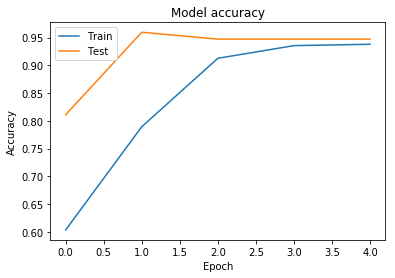

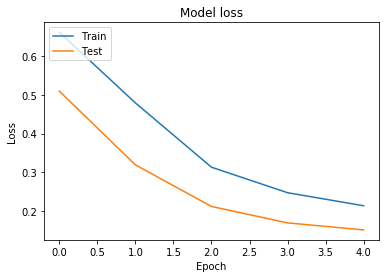

In [90]:
# Plot training & validation accuracy values
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [91]:
predictions = model.predict(X_test, batch_size=16, verbose=1)

84/84 [==============================] - 0s 4ms/step


In [92]:
len(predictions)

84

In [93]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [94]:
np.argmax(predictions[1])

5

In [95]:
np.argmax(y_test[1])

11

In [96]:
# rounded_preds = model.predict_classes(X_test, batch_size=16, verbose=1)

In [97]:
import sklearn
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [98]:
# print(np.argmax(y_test))
# print(np.argmax(predictions))
# print(y_test)
# print(predictions)
# need to create new lists

In [100]:
#use arrays to create test predictions and test labels
test_preds = []
test_labels = []
for i in range(len(y_test)):
    pred = np.argmax(predictions[i])
    label = np.argmax(y_test[i])
    test_preds.append(pred)
    test_labels.append(label)
print(test_preds)
print(test_labels)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 11, 11, 0, 11, 5, 9, 5, 4, 5, 10, 4, 5, 11, 5, 11, 5, 5, 5, 5, 10, 0, 14, 5, 5, 4, 0, 5, 5, 11, 5, 10, 4, 5, 14, 10, 11, 11, 0, 11, 5, 17, 11, 8, 5, 3, 5, 5, 5, 11, 5, 5, 5, 5, 5, 5, 4, 11, 4, 0, 4, 0, 5, 5, 10, 0, 5, 5, 5, 0, 5, 5, 15, 3, 11, 11, 11, 13, 0, 5, 5, 5, 11, 0]


In [101]:
cm = confusion_matrix(test_labels, test_preds)

[[ 0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]]


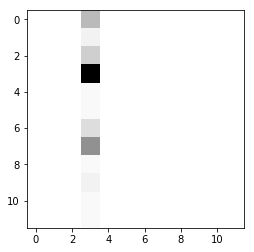

In [102]:
print(cm)
plt.imshow(cm, cmap='binary')

In [103]:
#plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.figure(figsize=(16,10))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [104]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix_(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    classes= classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.figure(figsize=(20, 20))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [107]:
# plot_confusion_matrix(cm, classes=list(range(18)))

Confusion matrix, without normalization
[[ 0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]]


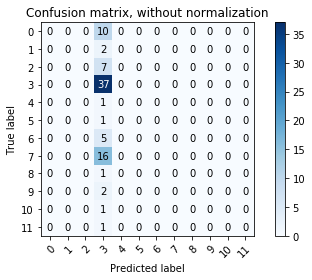

<Figure size 1440x1440 with 0 Axes>

In [106]:
plot_confusion_matrix_(test_labels, test_preds, classes=list(range(18)))

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.44      1.00      0.61        37
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00        16
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1

   micro avg       0.44      0.44      0.44        84
   macro avg       0.04      0.08      0.05        84
weighted avg       0.19      0.44      0.27        84



/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
#retry model after SMOTE adjustment
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.datasets import make_classification

In [111]:
# df = pd.DataFrame(y_train)
# df.get_values()
# y_train[0]

In [112]:
#resample train data
# X_train_, y = make_classification(n_classes=19, class_sep=19, n_features=20, n_informative= 18, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [113]:
# X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train, k_neighbors=18)

In [114]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [115]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [116]:
len(y_resampled)

2370

In [117]:
len(y_train)

334

In [180]:
# print(pd.Series(y_resampled).value_counts()) #error

In [126]:
embedding_size = 128
input_ = Input(shape=(100,))
x = Embedding(30000, embedding_size)(input_)
x = Bidirectional(LSTM(25, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.5)(x)
x = Dense(15, activation= 'sigmoid')(x)

In [127]:
model = Model(inputs=input_, outputs=x)

In [128]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 100, 128)          3840000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 50)           30800     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 50)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
__________

In [130]:
checkpoints_path = 'weights_base.best.hdf5'
checkpoint= ModelCheckpoint(checkpoints_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [131]:
early_stopping = EarlyStopping(monitor= 'val_loss', mode='min', patience=25)

In [132]:
callbacks = [checkpoint, early_stopping]

In [133]:
m = model.fit(X_resampled, y_resampled, batch_size=16, epochs=5, validation_split=0.1, callbacks=callbacks)

Train on 2133 samples, validate on 237 samples
Epoch 1/5
2133/2133 [==============================] - 18s 9ms/step - loss: 0.3923 - acc: 0.8463 - val_loss: 0.2787 - val_acc: 0.9333

Epoch 00001: val_loss improved from inf to 0.27867, saving model to weights_base.best.hdf5
Epoch 2/5
2133/2133 [==============================] - 20s 9ms/step - loss: 0.2649 - acc: 0.9321 - val_loss: 0.3110 - val_acc: 0.9333

Epoch 00002: val_loss did not improve from 0.27867
Epoch 3/5
2133/2133 [==============================] - 17s 8ms/step - loss: 0.2392 - acc: 0.9337 - val_loss: 0.3276 - val_acc: 0.9333

Epoch 00003: val_loss did not improve from 0.27867
Epoch 4/5
2133/2133 [==============================] - 17s 8ms/step - loss: 0.2156 - acc: 0.9366 - val_loss: 0.3309 - val_acc: 0.9333

Epoch 00004: val_loss did not improve from 0.27867
Epoch 5/5
2133/2133 [==============================] - 17s 8ms/step - loss: 0.1958 - acc: 0.9395 - val_loss: 0.3302 - val_acc: 0.9333

Epoch 00005: val_loss did not impr

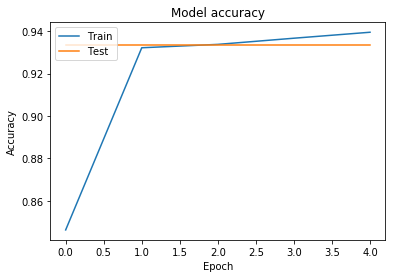

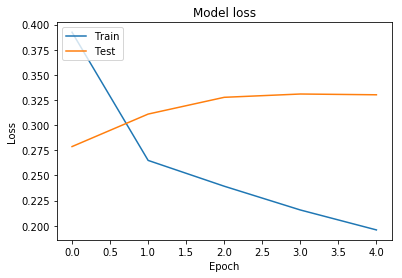

In [134]:
# Plot training & validation accuracy values
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [135]:
predictions = model.predict(X_test, batch_size=16, verbose=1)

84/84 [==============================] - 0s 4ms/step


In [136]:
test_preds = []
test_labels = []
for i in range(len(y_test)):
    pred = np.argmax(predictions[i])
    label = np.argmax(y_test[i])
    test_preds.append(pred)
    test_labels.append(label)
print(test_preds)
print(test_labels)

[9, 9, 9, 10, 0, 9, 10, 6, 5, 10, 4, 9, 2, 9, 2, 10, 2, 9, 9, 0, 0, 2, 12, 0, 9, 9, 9, 0, 9, 12, 9, 9, 9, 10, 0, 6, 9, 9, 2, 9, 9, 9, 0, 10, 9, 7, 0, 10, 6, 9, 4, 10, 2, 9, 7, 0, 10, 10, 10, 2, 9, 2, 0, 6, 9, 9, 9, 0, 9, 9, 0, 9, 0, 2, 10, 9, 9, 2, 9, 8, 0, 0, 9, 0]
[5, 11, 11, 0, 11, 5, 9, 5, 4, 5, 10, 4, 5, 11, 5, 11, 5, 5, 5, 5, 10, 0, 14, 5, 5, 4, 0, 5, 5, 11, 5, 10, 4, 5, 14, 10, 11, 11, 0, 11, 5, 17, 11, 8, 5, 3, 5, 5, 5, 11, 5, 5, 5, 5, 5, 5, 4, 11, 4, 0, 4, 0, 5, 5, 10, 0, 5, 5, 5, 0, 5, 5, 15, 3, 11, 11, 11, 13, 0, 5, 5, 5, 11, 0]


In [137]:
cm = confusion_matrix(test_labels, test_preds)

[[ 1  4  0  0  0  0  0  0  4  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  4  2  0  0  0  0  0  0]
 [10  4  0  1  0  3  1  1 13  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  1  0  1  0  0  2  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0 10  3  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


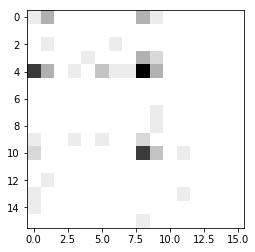

In [138]:
print(cm)
plt.imshow(cm, cmap='binary')

Confusion matrix, without normalization
[[ 1  4  0  0  0  0  0  0  4  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  4  2  0  0  0  0  0  0]
 [10  4  0  1  0  3  1  1 13  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  1  0  1  0  0  2  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0 10  3  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


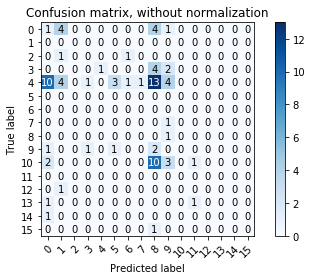

<Figure size 1440x1440 with 0 Axes>

In [139]:
plot_confusion_matrix_(test_labels, test_preds, classes=list(range(17)))

In [140]:
print(classification_report(test_labels, test_preds))

              precision    recall  f1-score   support

           0       0.06      0.10      0.08        10
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1

   micro avg       0.01      0.01      0.01        84
   macro avg       0.00   

/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and bein

In [ ]:
This performance is even worse! I will look into SMOTE and ADASYN

In [166]:
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

In [158]:
print(target.value_counts())

Hip Hop/Rap         195
R&B/Soul             55
Pop                  45
Alternative          43
Electronic           23
Dance                21
Rock                 13
Soundtrack            6
Hip-Hop               4
Indie Rock            2
World                 2
Jazz                  2
Reggae                1
Bollywood             1
Salsa y Tropical      1
Modern Dancehall      1
Vocal                 1
Country               1
Rap                   1
Name: Genre, dtype: int64


In [200]:
# sm = SMOTE(random_state=12, ratio = 1, k_neighbors=1)
sm = SMOTE(random_state=12, ratio = 1)

In [202]:
X_smote, y_smote = sm.fit_sample(int(X_train), int(y_train))

TypeError: only size-1 arrays can be converted to Python scalars

In [178]:
am = ADASYN(ratio = 1, n_neighbors=1)

In [198]:
xx = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,4,5,6,7]).reshape(-1, 1)
len(xx)
yy = np.array([1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1]).reshape(-1,1)

In [199]:
X_smote, y_smote = sm.fit_sample(xx, yy)

/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [283]:
# print((X_train[0]).reshape(-1, 1))
print(type(X_train[0][0]))
print(y_train[0])

<class 'numpy.int32'>
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [185]:
# test if smote works for integers
X_smtest, y_smtest = sm.fit_sample(np.array(test_labels).reshape(-1,1), np.array(test_preds).reshape(-1,1))

/Users/paulraymond/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

In [ ]:
this is my last hurdle holding me back from improving my model performance

In [142]:
# from keras.utils import plot_model
# from keras import metrics # delete

In [199]:
# # plot_model(m, to_file='bidirectional_model.png')  #delete
# # download graphviz
# print(model.evaluate(X_t, y))
# print(model.metrics_names)
# # print(train[0])
# # print(list_tokenized_train[0])
# print(model.predict(X_t)[0])
# #need to convert to class / label

In [198]:
# prediction = model.predict((X_t)) #delete
# print(prediction[67])
# print(len(prediction))

In [ ]:
#break up by genres / show difference

In [ ]:
#add validation and accuracy loss curves